# **1. DATA QUALITY ASSESSMENT**

Import libraries:

In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import os

Import data:

In [38]:
STRUTTURE = pd.read_csv('./Comune-di-Milano-Strutture-ricettive-alberghiere.csv',sep=';',encoding='unicode_escape')
STRUTTURE

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6.0,2121.0,3.0,13.0,16,1,hotel kennedy,1.0,6,23.0,23,Albergo
447,VLE TUNISIA N. 9 (z.d. 3),VLE,TUNISIA,9.0,2121.0,3.0,50.0,3;6;9;9;9,4,st. george hotel,NaN,A;1;2;3;4,99.0,5;16;26;26;26,Albergo
448,VLE VITTORIO VENETO N. 30 (z.d. 2),VLE,VITTORIO VENETO,30.0,2107.0,2.0,15.0,NaN,2,hotel casa mia,NaN,NaN,25.0,NaN,Albergo
449,VLE ZARA N. 1 (z.d. 9),VLE,ZARA,1.0,1170.0,9.0,32.0,NaN,4,casa albergo residence zara lagosta,NaN,NaN,64.0,NaN,Residence


Basic operation to inspect data:

In [291]:
#number of tuples and columns of the data source
print("Shape:",STRUTTURE.shape)

#show the schema of the data source
STRUTTURE.columns
for c in STRUTTURE.columns:
  print(c)

Shape: (451, 13)
Insegna
Via
Civico
Codice via
Municipio
Camere tot
Camere per piano
Stelle
Piani tot
Elenco piani
Posti letto tot
Posti letto per piano
Tipo struttura


In [59]:
#for each attribute the system shows the type of data. The type of data is defined analyzing the values
STRUTTURE.dtypes

Ubicazione                       object
Tipo via                         object
Descrizione via                  object
Civico                          float64
Codice via                      float64
ZD                              float64
Camere                          float64
Camere piano                     object
Categoria                        object
Insegna                          object
Piani totali                    float64
Piano piano                      object
Posti letto                     float64
Posti letto per piano            object
Tipo attività struture extra     object
dtype: object

In [294]:
#nunique counts the number of distinct values
for c in STRUTTURE.columns:
    print(f"Colonna: {c}")
    print(f" - Unique: {STRUTTURE[c].nunique()}")
    #print(f" - Freq:{STRUTTURE[c].value_counts()}")
    print(f" - Freq distribution:{STRUTTURE[c].value_counts().value_counts()}")


Colonna: Insegna
 - Unique: 435
 - Freq distribution:count
1    429
2      6
Name: count, dtype: int64
Colonna: Via
 - Unique: 310
 - Freq distribution:count
1     231
2      47
3      17
4      10
5       2
10      1
8       1
7       1
Name: count, dtype: int64
Colonna: Civico
 - Unique: 109
 - Freq distribution:count
1     48
2     17
3     11
5      5
12     3
4      3
8      3
9      3
15     3
10     2
7      2
6      2
14     2
22     1
13     1
16     1
19     1
23     1
Name: count, dtype: int64
Colonna: Codice via
 - Unique: 302
 - Freq distribution:count
1     227
2      44
3      17
4       9
5       2
10      1
8       1
7       1
Name: count, dtype: int64
Colonna: Municipio
 - Unique: 9
 - Freq distribution:count
110    1
75     1
73     1
46     1
36     1
33     1
29     1
26     1
20     1
Name: count, dtype: int64
Colonna: Camere tot
 - Unique: 148
 - Freq distribution:count
1     72
2     23
3     15
4     10
5      6
7      5
11     3
10     3
8      3
6      3
15  

**DUPLICATION** _--> analysed at the end, after cleaning_

Duplication occurs when a real-world entity is stored twice or more in a data source.

*Definition*: A measure of unwanted duplication existing within a data set.

*Evaluation*: Number of duplicates

In [64]:
#duplicated returns a boolean Series denoting the duplicate rows (exact matching)
STRUTTURE.duplicated()

#any shows if duplicates exist
STRUTTURE.duplicated().any()
#STRUTTURE[STRUTTURE.duplicated()]

False

**COMPLETENESS**

The completeness of a table characterizes the extent to which a table represents the corresponding real world.

Completeness in the relational model can be characterized by the presence of null values. In a model with null values, the presence of a null value has the general meaning of a missing value, i.e., a value that exist in the real-world but it is not available.

*Definition*: The degree to which a given data collection includes the data describing the corresponding set of real-world objects.

*Evaluation*: Number of not null values / Total number of values

In [65]:
STRUTTURE.isnull()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
1,False,True,True,True,True,True,False,False,False,False,True,True,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
447,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
448,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False
449,False,False,False,False,False,False,False,True,False,False,True,True,False,True,False


In [66]:
#display the number of not null values for each column
STRUTTURE.count()

Ubicazione                      451
Tipo via                        437
Descrizione via                 437
Civico                          421
Codice via                      437
ZD                              437
Camere                          450
Camere piano                    345
Categoria                       444
Insegna                         441
Piani totali                    187
Piano piano                     199
Posti letto                     450
Posti letto per piano           345
Tipo attività struture extra    441
dtype: int64

In [67]:
#total number of not null values
NOT_NULL = STRUTTURE.count().sum()

In [68]:
#display the number of null values for each column
STRUTTURE.isnull().sum()

Ubicazione                        0
Tipo via                         14
Descrizione via                  14
Civico                           30
Codice via                       14
ZD                               14
Camere                            1
Camere piano                    106
Categoria                         7
Insegna                          10
Piani totali                    264
Piano piano                     252
Posti letto                       1
Posti letto per piano           106
Tipo attività struture extra     10
dtype: int64

In [69]:
#total number of null values
NULL = STRUTTURE.isnull().sum().sum()
NULL

843

In [70]:
#total number of cells
TOT = NOT_NULL + NULL
TOT   #ok (451*15)

6765

COMPLETENESS EVALUATION:

In [71]:
COMPLETENESS = '{:,.2%}'.format(NOT_NULL/TOT)
COMPLETENESS

'87.54%'

Dealing with missing values with a different format:

In [72]:
MISSING = ['--', 'na', 'n.a.', 'N/A', 'NA', 'NaN', 'nan', 'null', 'Null', 'NULL'] #just to test

PROPERTY = pd.read_csv('./Comune-di-Milano-Strutture-ricettive-alberghiere.csv', sep=';',encoding='unicode_escape', na_values = MISSING)
PROPERTY
print(PROPERTY.isnull().sum().sum()) #<- result same as before

843


*ACCURACY and TIMELINESS -->CAN'T BE DONE BECAUSE NO EXTERNAL DATASET*

**CONSISTENCY**

The consistency dimension captures the violation of semantic rules defined over (a set of) data items, where items can be tuples of relational tables or records in a file.

Semantic rules can be integrity constaints, data edits or business rules.

*Definition*: The satisfaction of semantic rules defined over a set of data items.

*Evaluation*: Number of consistent tuples / Total number of tuples

In [74]:
STRUTTURE_COPY = STRUTTURE.copy()
STRUTTURE_COPY.head()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo


In [75]:
#rules:
#       - 1)Camere = somma Camere piano
#       - 2)Piani totali = somma Piano piano
#       - 3)Posti letto = somma Posti letto per piano
#       - 4)Camere <= (minore/uguale) Posti letto

#STRUTTURE_COPY['Camere piano'] = STRUTTURE_COPY['Camere piano'].fillna(0)
sum_Camere = STRUTTURE_COPY['Camere piano'].apply(lambda x: sum(int(n) for n in str(x).split(';') if n.strip().isdigit()))
STRUTTURE_COPY['Check_sum_camere'] = np.where(STRUTTURE_COPY['Camere'] == sum_Camere, 1, 0)

#STRUTTURE_COPY['Piano piano'] = STRUTTURE_COPY['Piano piano'].fillna(0)
sum_Piano = STRUTTURE_COPY['Piano piano'].apply(lambda x: len([n for n in str(x).split(';') if n.strip() != '' and pd.notna(n)]))
STRUTTURE_COPY['Check_sum_piani'] = np.where(STRUTTURE_COPY['Piani totali'] == sum_Piano, 1, 0)

#STRUTTURE_COPY['Posti letto per piano'] = STRUTTURE_COPY['Posti letto per piano'].fillna(0)
sum_Posti_letto_piano = STRUTTURE_COPY['Posti letto per piano'].apply(lambda x: sum(int(n) for n in str(x).split(';') if n.strip().isdigit()))
STRUTTURE_COPY['Check_sum_posti_letto'] = np.where(STRUTTURE_COPY['Posti letto'] == sum_Posti_letto_piano, 1, 0)

STRUTTURE_COPY['Check_camere_minore_letti'] = np.where(sum_Camere <= sum_Posti_letto_piano, 1, 0)

STRUTTURE_COPY.head()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra,Check_sum_camere,Check_sum_piani,Check_sum_posti_letto,Check_camere_minore_letti
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo,0,0,0,1
1,codvia 0000 num.024 ; (),NaN,NaN,NaN,NaN,NaN,259.0,259,4,radisson blu hotel milan,NaN,NaN,518.0,518,Albergo,1,0,1,1
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo,1,1,1,1
3,CSO BUENOS AIRES N. 26 (z.d. 3),CSO,BUENOS AIRES,26.0,2129.0,3.0,25.0,NaN,3,hotel buenos aires,NaN,NaN,39.0,NaN,Albergo,0,0,0,1
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo,0,1,0,1


In [76]:

PROPERTY_count = STRUTTURE_COPY[((STRUTTURE_COPY['Camere'].notna())& 
                                (STRUTTURE_COPY['Piani totali'].notna())&
                                (STRUTTURE_COPY['Posti letto'].notna())&
                                (STRUTTURE_COPY['Camere piano'].notna())&
                                (STRUTTURE_COPY['Piano piano'].notna())&
                                (STRUTTURE_COPY['Posti letto per piano'].notna()))]
PROPERTY_count

#PROPERTY_count.isnull().sum()

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra,Check_sum_camere,Check_sum_piani,Check_sum_posti_letto,Check_camere_minore_letti
2,CSO BUENOS AIRES N. 18 (z.d. 3),CSO,BUENOS AIRES,18.0,2129.0,3.0,16.0,16,1,hotel aurora,1.0,1,25.0,25,Albergo,1,1,1,1
4,CSO BUENOS AIRES N. 2 (z.d. 3),CSO,BUENOS AIRES,2.0,2129.0,3.0,46.0,15;11;8,3,albergo fenice,4.0,1;2;3;4,98.0,24;19;13,Albergo,0,1,0,1
6,CSO BUENOS AIRES N. 3 (z.d. 3),CSO,BUENOS AIRES,3.0,2129.0,3.0,116.0,4;23;24;24,4,cristoforo colombo,4.0,2;3;4;5,191.0,5;38;40;40,Albergo,0,1,0,1
12,CSO EUROPA N. 9 (z.d. 1),CSO,EUROPA,9.0,300.0,1.0,89.0,12;12;12;12;12;11;5,4,hotel galileo,7.0,1;2;3;4;5;6;7,159.0,22;22;22;22;22;21;6,Albergo,0,1,0,1
14,CSO GARIBALDI GIUSEPPE N. 84 (z.d. 1),CSO,GARIBALDI GIUSEPPE,84.0,1010.0,1.0,98.0,14;14;14;14;14;14;14,4,carlyle brera hotel,7.0,1;2;3;4;5;6;7,203.0,29;29;29;29;29;29;29,Albergo,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,VLE STURZO DON LUIGI N. 45 (z.d. 9),VLE,STURZO DON LUIGI,45.0,1704.0,9.0,420.0,70,4,atahotel executive,6.0,1;2;3;4;5;6,792.0,140,Albergo,0,1,0,1
442,VLE SUZZANI GIOVANNI N. 13 (z.d. 9),VLE,SUZZANI GIOVANNI,13.0,1446.0,9.0,172.0,30;11,4,novotel milano nord,7.0,1;2;3;4;5;6;7,344.0,60;22,Albergo,0,1,0,1
443,VLE SUZZANI GIOVANNI num.013/15 ; (z.d. 9),NaN,NaN,NaN,NaN,NaN,131.0,33,3,hotel ibis milano ca granda,4.0,1;2;3;4,262.0,66,Albergo,0,1,0,1
446,VLE TUNISIA N. 6 (z.d. 3),VLE,TUNISIA,6.0,2121.0,3.0,13.0,16,1,hotel kennedy,1.0,6,23.0,23,Albergo,0,1,1,1


In [77]:
#count the number of consistent tuples considering the rule
CONSISTENT1 = sum(PROPERTY_count['Check_sum_camere'] == 1)
CONSISTENT2 = sum(PROPERTY_count['Check_sum_piani'] == 1)
CONSISTENT3 = sum(PROPERTY_count['Check_sum_posti_letto'] == 1)
CONSISTENT4 = sum(PROPERTY_count['Check_camere_minore_letti'] == 1)

CONSISTENCY1 = '{:,.2%}'.format((CONSISTENT1 / PROPERTY_count['Check_sum_camere'].count()))
CONSISTENCY2 = '{:,.2%}'.format((CONSISTENT2 / PROPERTY_count['Check_sum_piani'].count()))
CONSISTENCY3 = '{:,.2%}'.format((CONSISTENT3 / PROPERTY_count['Check_sum_posti_letto'].count()))
CONSISTENCY4 = '{:,.2%}'.format((CONSISTENT4 / PROPERTY_count['Check_camere_minore_letti'].count()))

print("Consistency Check 1 (Camere = somma Camere piano): ", CONSISTENCY1)
print("Consistency Check 2 (Piani totali = somma Piano piano): ", CONSISTENCY2)
print("Consistency Check 3 (Posti letto = somma Posti letto per piano): ", CONSISTENCY3)
print("Consistency Check 4 (Camere <= Posti letto): ", CONSISTENCY4)    


Consistency Check 1 (Camere = somma Camere piano):  44.05%
Consistency Check 2 (Piani totali = somma Piano piano):  94.64%
Consistency Check 3 (Posti letto = somma Posti letto per piano):  33.33%
Consistency Check 4 (Camere <= Posti letto):  99.40%


# **2. DATA PROFILING**

In [ ]:
!pip install lux-api plotly matplotlib

**SINGLE COLUMN ANALYSIS**

**Cardinalities**

Cardinalities are numbers that summarize simple metadata (*e.g.,* number of rows, attributes, null values, distinct values, Uniqueness and Distinctness).

*Cardinality* = count of the number of distinct actual values.

*Uniqueness* = percentage calculated as Cardinality divided by the total number of records.

*Actual* = count of the number of records with an actual value (*i.e.,* not-null).

*Distinctness* = percentage calculated as Cardinality divided by Actual.

In [ ]:
import sys
!{sys.executable} -m pip install -U ydata-profiling[notebook]

In [ ]:
!pip install jupyter-contrib-nbextensions

In [ ]:
!jupyter-contrib-nbextension enable --py widgetsnbextension

In [ ]:
#!pip install dataprofiler

In [ ]:
#!pip install dataprofiler[ml] --user

In [84]:
#...
from ydata_profiling import ProfileReport
import pandas as pd
import json
from dataprofiler import Data, Profiler

profile = ProfileReport(STRUTTURE, title="STRUTTURE_Report")
#in html
profile.to_file("STRUTTURE_Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 15/15 [00:00<00:00, 54.59it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
readable_report = profile.report(report_options={"output_format": "compact"})
readable_report        #reported without the visualization info, more readable

# **3. ASSOCIATION RULES MINING**

Personal hp: no associations

# **4. DATA WRANGLING**

1. Column Renaiming:

In [89]:
STRUTTURE.head(1)

,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Insegna,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
0,ALZ NAVIGLIO GRANDE N. 8 (z.d. 6),ALZ,NAVIGLIO GRANDE,8.0,5144.0,6.0,14.0,NaN,4,HOTEL MAISON BORELLA,NaN,NaN,25.0,NaN,Albergo


In [39]:
STRUTTURE = STRUTTURE.rename({'Camere':'Camere tot',
                              'Camere piano':'Camere per piano',
                              'Piani totali':'Piani tot',
                              'Piano piano':'Elenco piani',
                              'Posti letto':'Posti letto tot'})

2. Sorting:

In [40]:
#before put the name at the beginning:
col = 'Insegna'  # column to be moved
cols = [col] + [c for c in STRUTTURE.columns if c != col]
STRUTTURE = STRUTTURE[cols]

#then sort:
STRUTTURE = STRUTTURE.sort_values(by ='Insegna',ascending=True)
STRUTTURE.head()

,Insegna,Ubicazione,Tipo via,Descrizione via,Civico,Codice via,ZD,Camere,Camere piano,Categoria,Piani totali,Piano piano,Posti letto,Posti letto per piano,Tipo attività struture extra
218,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO N. 31 (z.d. 1),VIA,MANZONI ALESSANDRO,31.0,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,Albergo
144,BIO CITY HOTEL,VIA EDOLO N. 18 (z.d. 2),VIA,EDOLO,18.0,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,Albergo
5,GALAXY G SRL,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33.0,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,Albergo
257,HOTEL ADAM,VIA PALMANOVA N. 153 (z.d. 2),VIA,PALMANOVA,153.0,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,Albergo
301,HOTEL ADLER,VIA RICORDI GIOVANNI N. 10 (z.d. 3),VIA,RICORDI GIOVANNI,10.0,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,Albergo


3. Column filtering: _not done_
4. Dropping:

In [41]:
#Before drop 'Ubicazione' fill the values of 'Tipo via' 'Descrizione via' 'Civico' 'Codice via' 'ZD'
# download fixed by Sveva

STRUTTURE2 = pd.read_csv('Dataset_indirizzi_sistemati.csv')
STRUTTURE2 = STRUTTURE2.drop(["Unnamed: 0"], axis = 1)
STRUTTURE2.head()

#added rename and sorting part:
STRUTTURE2 = STRUTTURE2.rename(columns={'Camere':'Camere tot',
                              'Camere piano':'Camere per piano',
                              'Piani totali':'Piani tot',
                              'Piano piano':'Elenco piani',
                              'Posti letto':'Posti letto tot'})

#before put the name at the beginning:
col = 'Insegna'  # la colonna da spostare
cols = [col] + [c for c in STRUTTURE2.columns if c != col]
STRUTTURE2 = STRUTTURE2[cols]

STRUTTURE2 = STRUTTURE2.sort_values(by ='Insegna',ascending=True)
STRUTTURE2.head()

,Insegna,Ubicazione,Tipo via,Nome via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
218,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO N. 31 (z.d. 1),VIA,MANZONI ALESSANDRO,31,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,Albergo
144,BIO CITY HOTEL,VIA EDOLO N. 18 (z.d. 2),VIA,EDOLO,18,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,Albergo
5,GALAXY G SRL,CSO BUENOS AIRES N. 33 (z.d. 3),CSO,BUENOS AIRES,33,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,Albergo
257,HOTEL ADAM,VIA PALMANOVA N. 153 (z.d. 2),VIA,PALMANOVA,153,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,Albergo
301,HOTEL ADLER,VIA RICORDI GIOVANNI N. 10 (z.d. 3),VIA,RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,Albergo


In [42]:
#drop 'Ubicazione'
STRUTTURE2 = STRUTTURE2.drop(columns=['Ubicazione'])
STRUTTURE2.head()

#Possible to remove 'Elenco piani' because more than half are NaN,
#before use in the next step 'Elenco piani' to fill NaN in 'Piani tot'
#then drop 'Elenco piani'

,Insegna,Tipo via,Nome via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
218,ARMANI HOTEL MILANO,VIA,MANZONI ALESSANDRO,31,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,Albergo
144,BIO CITY HOTEL,VIA,EDOLO,18,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,Albergo
5,GALAXY G SRL,CSO,BUENOS AIRES,33,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,Albergo
257,HOTEL ADAM,VIA,PALMANOVA,153,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,Albergo
301,HOTEL ADLER,VIA,RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,Albergo


5. Standardization: _nothing_
6. Column Splitting: _nothing_
7. Column Merging:

In [43]:
STRUTTURE2['Via'] = STRUTTURE2['Tipo via'].str.cat(STRUTTURE2['Nome via'], sep=' ')
col = 'Via'  # column to be moved
cols = ['Insegna'] + [col] + [c for c in STRUTTURE2.columns if c != col and c != 'Insegna']
STRUTTURE2 = STRUTTURE2[cols]

STRUTTURE2 = STRUTTURE2.drop(columns=['Tipo via','Nome via'])
STRUTTURE2.head()

,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
218,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO,31,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,Albergo
144,BIO CITY HOTEL,VIA EDOLO,18,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,Albergo
5,GALAXY G SRL,CSO BUENOS AIRES,33,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,Albergo
257,HOTEL ADAM,VIA PALMANOVA,153,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,Albergo
301,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,Albergo


8. Dealing with missing numbers: _to be done later_
9. Formatting values:

In [44]:
# select float columns
float_cols = [col for col in STRUTTURE2.select_dtypes(include="float64").columns if col != "Civico"]

# apply format mapping (in this case change of format)
STRUTTURE2[float_cols] = STRUTTURE2[float_cols].astype("Int64")

STRUTTURE2['Insegna'] = STRUTTURE2['Insegna'].str.upper()
STRUTTURE2['Via'] = STRUTTURE2['Via'].str.upper()
STRUTTURE2['Tipo struttura'] = STRUTTURE2['Tipo struttura'].str.upper()
STRUTTURE2


,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
218,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO,31,230,1,95,NaN,5 STELLE LUSSO,<NA>,NaN,190,NaN,ALBERGO
144,BIO CITY HOTEL,VIA EDOLO,18,1217,2,17,NaN,1,<NA>,NaN,32,NaN,ALBERGO
5,GALAXY G SRL,CSO BUENOS AIRES,33,2129,3,65,0,4,<NA>,NaN,97,0,ALBERGO
257,HOTEL ADAM,VIA PALMANOVA,153,2390,2,59,NaN,NaN,<NA>,NaN,99,NaN,ALBERGO
301,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251,3,23,NaN,NaN,<NA>,NaN,47,NaN,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,NaN,VIA ORSEOLO PIETRO,1,5113,6,59,NaN,4,<NA>,NaN,101,NaN,ALBERGO
322,NaN,VIA SANTA RADEGONDA,14,<NA>,1,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN
326,NaN,VIA SAN TOMASO,8,723,1,11,NaN,4,<NA>,NaN,22,NaN,ALBERGO
355,NaN,VIA STEPHENSON GIORGIO,55,<NA>,<NA>,256,NaN,4,<NA>,NaN,512,NaN,ALBERGO


In [162]:
#Save to file
STRUTTURE2.to_csv('Dataset_strutture.csv')

In [45]:
STRUTTURE2.dtypes

Insegna                  object
Via                      object
Civico                   object
Codice via                Int64
Municipio                 Int64
Camere tot                Int64
Camere per piano         object
Stelle                   object
Piani tot                 Int64
Elenco piani             object
Posti letto tot           Int64
Posti letto per piano    object
Tipo struttura           object
dtype: object

# **DATA CLEANING**

***Data cleaning*** is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.

**GIGO**: if data are incorrect, outcomes and algorithms are often unreliable. There is no one absolute way to establish the exact steps in the data cleaning process, it depends on the context.

Tasks:
1. Normalization/Standardization
2. Error Detection and Correction (*e.g.,* inconsistencies, missing data, outliers)
3. Duplicate Detection (and Data Fusion)

# **5. MISSING VALUES IMPUTATION**

***Data Imputation*** is the process of replacing missing data with substituted values. Missing values can introduce bias, can make some analyses difficult to be performed (even some algorithms do not support them) and decrease efficiency.

Data Imputation Methods:

*   SINGLE IMPUTATION
*   ML-BASED IMPUTATION
*   MULTIPLE IMPUTATION

In [163]:
!git clone https://github.com/camillasancricca/DATADIQ.git

Cloning into 'DATADIQ'...


In [165]:
import pandas as pd
import numpy as np
#import missingno as mno

from sklearn import linear_model
from sklearn import ensemble
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor

from DATADIQ import scripts_for_E5 as s

**1. SINGLE IMPUTATION**

  - Replace with *standard values*
  - *Propagate* the last/next valid observation
  - *Replace* with the mean, median, standard deviation, most frequent value

In [236]:
STRUTTURE = pd.read_csv('Dataset_strutture.csv')
STRUTTURE = STRUTTURE.drop(["Unnamed: 0"], axis = 1)
STRUTTURE.isnull().sum()

Insegna                   10
Via                        0
Civico                     0
Codice via                14
Municipio                  3
Camere tot                 1
Camere per piano         106
Stelle                     7
Piani tot                264
Elenco piani             252
Posti letto tot            1
Posti letto per piano    106
Tipo struttura             2
dtype: int64

In [196]:
unique_values, counts = np.unique(STRUTTURE['Piani tot'], return_counts=True)
print(unique_values)
print(counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 17. nan]
[ 17  13  37  36  24  20  20  12   5   1   2 264]


In [ ]:
STRUTTURE[(STRUTTURE["Posti letto per piano"] == '0') | (STRUTTURE["Camere per piano"] == '0') ]
#There are 108 rows where Posti letto per piano or Camere per piano are not reliable

,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
2,GALAXY G SRL,CSO BUENOS AIRES,33,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,ALBERGO
7,HOTEL BRIVIO,VIA BRIVIO CESARE,33,1502.0,9.0,12.0,0,2,NaN,NaN,21.0,0,ALBERGO
11,HOTEL FIERA CONGRESSI,VIA SPINOLA AMBROGIO,9,6369.0,8.0,29.0,0,3,NaN,NaN,53.0,0,ALBERGO
17,HOTEL SAN FRANCISCO,VLE LOMBARDIA,55,2400.0,3.0,28.0,0,3,NaN,NaN,55.0,0,ALBERGO
33,ALBERGO LARIO,VIA LARIO,40,1171.0,9.0,7.0,0,1,NaN,NaN,17.0,0,ALBERGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,TOWN HOUSE GALLERIA,VIA PELLICO SILVIO,8,NaN,1.0,18.0,0,l,NaN,NaN,25.0,0,ALBERGO
431,UNA HOTEL MEDITERRANEO,VIA MURATORI LODOVICO,14,4076.0,4.0,93.0,0,4,NaN,NaN,206.0,0,ALBERGO
432,UNA HOTEL SCANDINAVIA,VIA FAUCHE' GIOVANNI BATTISTA,15,7192.0,8.0,153.0,0,4,NaN,NaN,292.0,0,ALBERGO
433,UNA HOTEL TOCQ,VIA DI TOCQUEVILLE ALESSIO,7,1703.0,9.0,109.0,0,4,NaN,NaN,272.0,0,ALBERGO


In [237]:
STRUTTURE.loc[STRUTTURE["Posti letto per piano"] == '0', "Posti letto per piano"] = np.nan
STRUTTURE.loc[STRUTTURE["Camere per piano"] == '0', "Camere per piano"] = np.nan

In [207]:
STRUTTURE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insegna                441 non-null    object 
 1   Via                    451 non-null    object 
 2   Civico                 451 non-null    object 
 3   Codice via             437 non-null    float64
 4   Municipio              448 non-null    float64
 5   Camere tot             450 non-null    float64
 6   Camere per piano       237 non-null    object 
 7   Stelle                 444 non-null    object 
 8   Piani tot              187 non-null    float64
 9   Elenco piani           199 non-null    object 
 10  Posti letto tot        450 non-null    float64
 11  Posti letto per piano  237 non-null    object 
 12  Tipo struttura         449 non-null    object 
dtypes: float64(5), object(8)
memory usage: 45.9+ KB


In [238]:
count_piani_elenco = STRUTTURE['Elenco piani'].str.split(';').str.len()
count_piani_camere = STRUTTURE['Camere per piano'].str.split(';').str.len()
count_piani_letti = STRUTTURE['Posti letto per piano'].str.split(';').str.len()

In [239]:
count=STRUTTURE.copy()
count["count_piani_elenco"]=count_piani_elenco
count["count_piani_camere"]=count_piani_camere
count["count_piani_letti"]=count_piani_letti
count["numero piani"]=count["Piani tot"].astype("Int64", errors='ignore')
count['count_piani_elenco'] = count['count_piani_elenco'].astype("Int64", errors='ignore')
count['count_piani_camere'] = count['count_piani_camere'].astype("Int64", errors='ignore')
count['count_piani_letti'] = count['count_piani_letti'].astype("Int64", errors='ignore')
count

,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura,count_piani_elenco,count_piani_camere,count_piani_letti,numero piani
0,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO,31,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
1,BIO CITY HOTEL,VIA EDOLO,18,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
2,GALAXY G SRL,CSO BUENOS AIRES,33,2129.0,3.0,65.0,NaN,4,NaN,NaN,97.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
3,HOTEL ADAM,VIA PALMANOVA,153,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
4,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,NaN,VIA ORSEOLO PIETRO,1,5113.0,6.0,59.0,NaN,4,NaN,NaN,101.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
447,NaN,VIA SANTA RADEGONDA,14,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>
448,NaN,VIA SAN TOMASO,8,723.0,1.0,11.0,NaN,4,NaN,NaN,22.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>
449,NaN,VIA STEPHENSON GIORGIO,55,NaN,NaN,256.0,NaN,4,NaN,NaN,512.0,NaN,ALBERGO,<NA>,<NA>,<NA>,<NA>


In [212]:
df_filtrato = count[
    (count['count_piani_elenco'].notna()) |
    (count['count_piani_camere'].notna()) |
    (count['count_piani_letti'].notna()) |
    (count['numero piani'].notna())
]
df_coherent = df_filtrato[
    (df_filtrato['count_piani_elenco'].astype("Int64")==df_filtrato['count_piani_camere'].astype("Int64")) &
    (df_filtrato['count_piani_camere'].astype("Int64")==df_filtrato['count_piani_letti'].astype("Int64")) &
    (df_filtrato['count_piani_letti'].astype("Int64")==df_filtrato['numero piani'].astype("Int64"))
]
print(df_coherent.shape)
df_coherent
# there are 122 rows in which there are coherent not null values

(122, 17)


,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura,count_piani_elenco,count_piani_camere,count_piani_letti,numero piani
13,HOTEL LIDO,VIA GALLI RICCARDO,8,6405.0,8.0,27.0,7;;6;,3,4.0,R;1;M;2,36.0,10;;6;,ALBERGO,4,4,4,4
24,STYLE HOTEL,VIA MERCATO,1,717.0,1.0,14.0,5;7,1,2.0,1;2,25.0,8;12,ALBERGO,2,2,2,2
32,ALBERGO LA PACE,VIA CATALANI ALFREDO,69,2425.0,3.0,20.0,3;4;4;4;4;1,1,6.0,1;2;3;4;5;6,33.0,6;0;0;0;0;2,ALBERGO,6,6,6,6
38,ALBERGO POERIO,VIA POERIO CARLO,32,3181.0,3.0,13.0,2;5;5;2,1,4.0,T;1;2;3,20.0,4;7;7;2,ALBERGO,4,4,4,4
41,ALBERGO SUSA,VLE ARGONNE,14,3254.0,4.0,19.0,6;8;2;4,3,4.0,2;3;T;1,37.0,9;8;8;5,ALBERGO,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,TRENTO,VIA DAL POZZO TOSCANELLI PAOLO,4,2516.0,2.0,16.0,6;6;4,1,3.0,1;2;3,23.0,8;9;6,ALBERGO,3,3,3,3
435,VECCHIA MILANO,VIA BORROMEI,4,632.0,1.0,28.0,16;10,3,2.0,1;2,43.0,23;17,ALBERGO,2,2,2,2
436,VILLA GIOVANNA,VIA WASHINGTON GIORGIO,42,6111.0,7.0,12.0,4;4;4,1,3.0,1;2;M,16.0,6;6;4,ALBERGO,3,3,3,3
437,VILLA MIRA,VIA SACCHINI ANTONIO GASPARE,19,2252.0,3.0,10.0,1;5;4,1,3.0,T;1;2,18.0,2;8;8,ALBERGO,3,3,3,3


In [213]:
df_tot_na = count[(count['numero piani'].isna()&((count['count_piani_elenco'].notna()) |
    (count['count_piani_camere'].notna()) |
    (count['count_piani_letti'].notna())))
]
df_tot_na.shape
#There are 66 rows where Tot piani is nan but one of the other values is not

(66, 17)

In [242]:
df_tot_na = count[(count['numero piani'].isna()&((count['count_piani_elenco'].isna()))&(
    (count['count_piani_camere'].notna()) |
    (count['count_piani_letti'].notna())))
]
print(df_tot_na.shape)
df_tot_na

(35, 17)


,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura,count_piani_elenco,count_piani_camere,count_piani_letti,numero piani
8,HOTEL CASTELLETTO,VIA ARCHIMEDE,79,3086.0,4.0,14.0,14,2,NaN,NaN,22.0,22,ALBERGO,<NA>,1,1,<NA>
16,HOTEL PRINCIPE DI SAVOIA,PZA DELLA REPUBBLICA,17,1055.0,2.0,302.0,412,5,NaN,NaN,725.0,812,ALBERGO,<NA>,1,1,<NA>
26,ACCA PALACE,VIA NICOTERA GIOVANNI,9,1508.0,9.0,41.0,41,4,NaN,NaN,82.0,82,RESIDENCE,<NA>,1,1,<NA>
58,BOSCOLO HOTEL EXEDRA,CSO MATTEOTTI GIACOMO,4/6,218.0,1.0,154.0,154,l,NaN,NaN,308.0,308,ALBERGO,<NA>,1,1,<NA>
82,EXELLENT,VLE DEI MILLE,48,3115.0,3.0,14.0,14,1,NaN,NaN,16.0,16,ALBERGO,<NA>,1,1,<NA>
116,HOTEL AMBRA,VIA CACCIANINO ANTONIO,10,2419.0,3.0,8.0,8,1,NaN,NaN,18.0,18,ALBERGO,<NA>,1,1,<NA>
117,HOTEL AMENDOLA FIERA,VIA CARCANO FILIPPO,39,6389.0,7.0,11.0,11,1,NaN,NaN,23.0,23,ALBERGO,<NA>,1,1,<NA>
120,HOTEL ARES,VIA PORRO EDOARDO,8,1226.0,9.0,13.0,13,3,NaN,NaN,21.0,21,ALBERGO,<NA>,1,1,<NA>
128,HOTEL AUTOSOLE 2,VIA PALMIERI NICOLA,64,5323.0,5.0,23.0,23,3,NaN,NaN,46.0,46,ALBERGO,<NA>,1,1,<NA>
137,HOTEL BRENTA MILANO,VLE BRENTA,33,4151.0,4.0,12.0,12,NaN,NaN,NaN,23.0,23,ALBERGO,<NA>,1,1,<NA>


In [214]:
# --- 1. Trovare il Valore di Riferimento Non Nullo ---

# Combina le tre colonne. Il risultato avrà il primo valore non nullo
# trovato nell'ordine: 'elenco', 'camere', 'letti'.
valore_coerente_non_nullo = (
    count['count_piani_elenco']
    .combine_first(count['count_piani_camere'])
    .combine_first(count['count_piani_letti'])
)

# --- 2. DEFINIZIONE DELLA CONDIZIONE FINALE (COME PRIMA) ---

# Uso di parentesi aggiuntive per garantire la corretta precedenza
condizione_uguaglianza = (
    ((count['count_piani_elenco'] == count['count_piani_camere']) | (count['count_piani_elenco'].isna() | count['count_piani_camere'].isna())) &
    ((count['count_piani_camere'] == count['count_piani_letti']) | (count['count_piani_camere'].isna() | count['count_piani_letti'].isna())) &
    ((count['count_piani_elenco'] == count['count_piani_letti']) | (count['count_piani_letti'].isna() | count['count_piani_elenco'].isna()))
)

condizione_finale = (
    count['numero piani'].isna() &
    condizione_uguaglianza
)

# --- 3. ASSEGNAZIONE DEL VALORE CON .loc ---

colonna_target = 'numero piani'

# Assegna alla colonna target il VALORE_COERENTE_NON_NULLO SOLO dove la condizione_finale è True.
count.loc[condizione_finale, colonna_target] = valore_coerente_non_nullo.loc[condizione_finale]

# --- 4. CASTING FINALE ---

count[colonna_target] = count[colonna_target].astype("Int64", errors='ignore')
# 60 rows substituted

In [215]:
count.info()
# Still 204 Nan remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insegna                441 non-null    object 
 1   Via                    451 non-null    object 
 2   Civico                 451 non-null    object 
 3   Codice via             437 non-null    float64
 4   Municipio              448 non-null    float64
 5   Camere tot             450 non-null    float64
 6   Camere per piano       237 non-null    object 
 7   Stelle                 444 non-null    object 
 8   Piani tot              187 non-null    float64
 9   Elenco piani           199 non-null    object 
 10  Posti letto tot        450 non-null    float64
 11  Posti letto per piano  237 non-null    object 
 12  Tipo struttura         449 non-null    object 
 13  count_piani_elenco     199 non-null    Int64  
 14  count_piani_camere     237 non-null    Int64  
 15  count_

In [216]:
# When count_piani_elenco is not coherent with count_piani_camere/letti we use count_piani_elenco
count['numero piani'] = count['numero piani'].fillna(count_piani_elenco)
count.info()
#198 Nan remaining

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insegna                441 non-null    object 
 1   Via                    451 non-null    object 
 2   Civico                 451 non-null    object 
 3   Codice via             437 non-null    float64
 4   Municipio              448 non-null    float64
 5   Camere tot             450 non-null    float64
 6   Camere per piano       237 non-null    object 
 7   Stelle                 444 non-null    object 
 8   Piani tot              187 non-null    float64
 9   Elenco piani           199 non-null    object 
 10  Posti letto tot        450 non-null    float64
 11  Posti letto per piano  237 non-null    object 
 12  Tipo struttura         449 non-null    object 
 13  count_piani_elenco     199 non-null    Int64  
 14  count_piani_camere     237 non-null    Int64  
 15  count_

In [218]:
count[count['Posti letto tot'].isna() | count['Camere tot'].isna()]


,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura,count_piani_elenco,count_piani_camere,count_piani_letti,numero piani
447,NaN,VIA SANTA RADEGONDA,14,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>,<NA>


In [219]:
count = count.dropna(subset=['Camere tot'])

In [220]:
count["Piani tot"]=count["numero piani"].astype("Int64")

/var/folders/g_/kd_r94dx7zjgpw09dcb35gj00000gp/T/ipykernel_99445/83704372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  count["Piani tot"]=count["numero piani"].astype("Int64")


In [221]:
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 450
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insegna                441 non-null    object 
 1   Via                    450 non-null    object 
 2   Civico                 450 non-null    object 
 3   Codice via             437 non-null    float64
 4   Municipio              447 non-null    float64
 5   Camere tot             450 non-null    float64
 6   Camere per piano       237 non-null    object 
 7   Stelle                 444 non-null    object 
 8   Piani tot              253 non-null    Int64  
 9   Elenco piani           199 non-null    object 
 10  Posti letto tot        450 non-null    float64
 11  Posti letto per piano  237 non-null    object 
 12  Tipo struttura         449 non-null    object 
 13  count_piani_elenco     199 non-null    Int64  
 14  count_piani_camere     237 non-null    Int64  
 15  count_piani

In [222]:
colonne_da_eliminare = ['numero piani','Elenco piani', 'count_piani_elenco', 'count_piani_elenco','count_piani_camere','count_piani_letti','Posti letto per piano','Camere per piano']

count = count.drop(
    colonne_da_eliminare,
    axis=1  
)
count.info()

<class 'pandas.core.frame.DataFrame'>
Index: 450 entries, 0 to 450
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Insegna          441 non-null    object 
 1   Via              450 non-null    object 
 2   Civico           450 non-null    object 
 3   Codice via       437 non-null    float64
 4   Municipio        447 non-null    float64
 5   Camere tot       450 non-null    float64
 6   Stelle           444 non-null    object 
 7   Piani tot        253 non-null    Int64  
 8   Posti letto tot  450 non-null    float64
 9   Tipo struttura   449 non-null    object 
dtypes: Int64(1), float64(4), object(5)
memory usage: 39.1+ KB


In [223]:
#Save to file
count.to_csv('Piani_puliti.csv')

In [224]:
count.isnull().sum()

Insegna              9
Via                  0
Civico               0
Codice via          13
Municipio            3
Camere tot           0
Stelle               6
Piani tot          197
Posti letto tot      0
Tipo struttura       1
dtype: int64

In [225]:
unique_values, counts = np.unique(count["Piani tot"], return_counts=True)
print(unique_values)
print(counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 17. nan]
[ 53  17  43  36  29  26  24  13   6   4   2 197]


In [226]:
STRUTTURE = pd.read_csv('Dataset_strutture.csv')
STRUTTURE = STRUTTURE.drop(["Unnamed: 0"], axis = 1)
STRUTTURE.isnull().sum()

Insegna                   10
Via                        0
Civico                     0
Codice via                14
Municipio                  3
Camere tot                 1
Camere per piano         106
Stelle                     7
Piani tot                264
Elenco piani             252
Posti letto tot            1
Posti letto per piano    106
Tipo struttura             2
dtype: int64

In [ ]:
# Count elements in 'Elenco piani'
count_piani = STRUTTURE['Elenco piani'].str.split(';').str.len()
unique_values, counts = np.unique(count_piani, return_counts=True)
print(unique_values)
print(counts)

# fill NaN with count
STRUTTURE['Piani tot'] = STRUTTURE['Piani tot'].fillna(count_piani)

STRUTTURE['Piani tot'].isnull().sum()  #Piani tot passed from 264 to 233 NaN

#now possible to remove 'Elenco piani'
STRUTTURE = STRUTTURE.drop(['Elenco piani'], axis=1)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]
[ 12  14  42  33  28  27  21  10   5   7 252]


In [232]:
STRUTTURE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Insegna                441 non-null    object 
 1   Via                    451 non-null    object 
 2   Civico                 451 non-null    object 
 3   Codice via             437 non-null    float64
 4   Municipio              448 non-null    float64
 5   Camere tot             450 non-null    float64
 6   Camere per piano       345 non-null    object 
 7   Stelle                 444 non-null    object 
 8   Piani tot              218 non-null    float64
 9   Posti letto tot        450 non-null    float64
 10  Posti letto per piano  345 non-null    object 
 11  Tipo struttura         449 non-null    object 
dtypes: float64(5), object(7)
memory usage: 42.4+ KB


In [233]:
unique_values, counts = np.unique(STRUTTURE['Piani tot'], return_counts=True)
print(unique_values)
print(counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 17. nan]
[ 18  17  43  36  29  26  24  13   6   4   2 233]


In [234]:
unique_values, counts = np.unique(count['Piani tot'], return_counts=True)
print(unique_values)
print(counts)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 17. nan]
[ 53  17  43  36  29  26  24  13   6   4   2 197]


**2. ML-BASED IMPUTATION**    _NOT USED_

*Algorithms*:
  - k-Nearest Neighbors (KNNImputer)
  - Linear/Logistic Regression
  - Other algorithms (e.g., Random Forest)

**3. MICE (Multiple Imputation by Chained Equations)**

*sklearn* library: IterativeImputer

  - The *MICE* procedure imputes missing data through an iterative series of predictive models. In each iteration, each specified variable in the dataset is imputed using the other variables in the dataset. These iterations should be run until it appears that convergence has been met.

# **6. OUTLIER DETECTION**

***Outlier Detection*** is the process of detecting outliers (*i.e.,* data points that differs significantly from the other observations) from a given set of data.

Outlier Detection Methods:
- STATISTICS-BASED
    - Hypothesis Testing
        - Grubbs test
    - Fitting distributions
        - Z-Score
        - MAD (Median absolute deviation)
        - IQR (Interquartile range)
        - Box Plots, Scatter Plots, Histograms
        - KDE (Kernel Density Estimation)
- DISTANCE-BASED
    - LOF (Local Outlier Factor)
- MODEL-BASED
    - k-Nearest Neighbors
    - Clustering (DBSCAN)

In [186]:
!pip install outlier-utils

In [187]:
import numpy as np
import seaborn as sns
from numpy import quantile

import sklearn
from sklearn.datasets import fetch_california_housing, load_iris
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import load_iris
from sklearn.neighbors import KernelDensity
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest

from outliers import smirnov_grubbs as grubbs
import matplotlib.pyplot as plt

from DATADIQ import scripts_for_E5 as s

**1. STATISTICS-BASED**

Hypothesis Testing **Grubbs Test** _<-- NOT USED_

- Steps:
      1. Define:
            1.1 Null (no outliers) and Alternative (1 outlier) hypothesis
            1.2 The appropriate test and the relevant test statistic T
            1.3 Significance level alpha (below this threshold reject the null hyp.)
            1.4 Critical region (values) in which null hyp. is rejected
      2. Compute from the current data the observed value of t
      3. Reject the null hyp. if t is under the critical region

BOXPLOT:

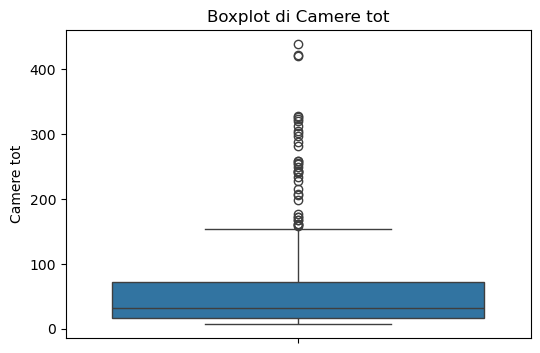

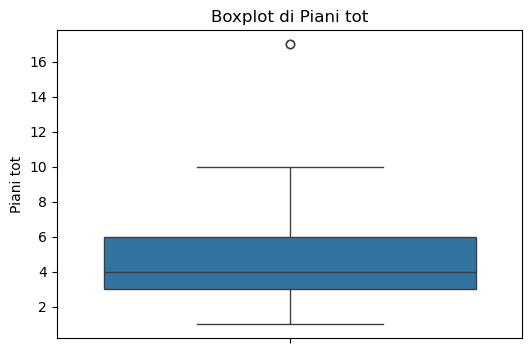

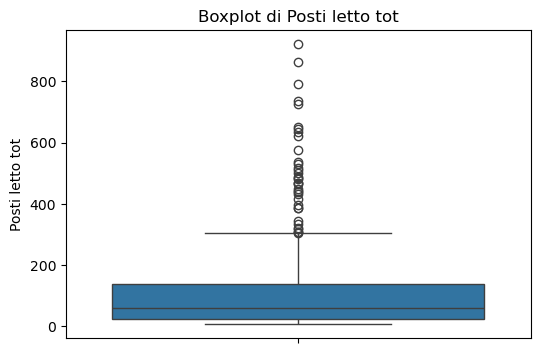

In [201]:
#Perform two-side Grubbs' test
#select numeric columns
%matplotlib inline

num_cols = ['Camere tot', 'Piani tot', 'Posti letto tot']

for c in num_cols:
    plt.figure(figsize=(6,4))          # crea una nuova figura per ogni colonna
    sns.boxplot(y=STRUTTURE[c])        # specifica l’asse
    plt.title(f"Boxplot di {c}")
    plt.show()


#print(g_test_results)

In [299]:
# only outlier identified by looking at the data

STRUTTURE[STRUTTURE['Via'] == 'CODVIA 0000'] #<- di solito significa nessun valore nel catasto
STRUTTURE['Via'] = STRUTTURE['Via'].replace("CODVIA 0000", np.nan) #set as NaN

# **7. SIMILARITY MEASURES AND DUPLICATE DETECTION**

**PART 1: SIMILARITIES MEASURES**      _NOT USED_

- Distance-Based Comparison Functions

  - String-Based Distance Functions
    - Edit-based Similarity Measures
      - Edit Distance/Levenshtein Distance
    - Phonetic-based Algorithms
      - Sounded Code (American Soundex)
    - Jaro-Winkler String Comparator
  - Item-Based Distance Functions
    - Jaccard Distance
    - TF-IDF: Term Frequency - Inverse Document Frequency (or Cosine Similarity)

**PART 2: DUPLICATE DETECTION**

**Duplicate Detection** is the discovery of multiple representations of the same real-world object.
- Exact Matching
- Record Linkage (Not-Exact Matching)

**1. Exact Matching**

In [300]:
STRUTTURE.duplicated().sum()

0

**2. Record Linkage (RL)**

*Record Linkage* is the task of finding records in a data set that refer to the same entity (not-exact matching) across different data sources.

- Steps:
      1. Find the candidate records to compare
      2. Compare the candidate records and find duplicates
      
**RL** *Single Data Source*: Record linkage is a good option to find duplicates within a dataset.

**2.1 Find the candidate pairs**

The goal is to detect the record pairs to compare.

This process of making record pairs is also called ‘indexing’.

The ***recordlinkage*** library builds the set of pairs to compare.

In [ ]:
!pip install recordlinkage

In [221]:
import recordlinkage

In [275]:
#First, load the recordlinkage.Index class and call the .full method.
#This object generates a full index on a .index(...) call.
#In case of deduplication of a single dataframe, one dataframe is sufficient as input argument.
indexer = recordlinkage.Index()

indexer.full()
candidate_links = indexer.index(STRUTTURE)

print(len(STRUTTURE), len(candidate_links))
candidate_links

451 101475


MultiIndex([(  1,   0),
            (  2,   0),
            (  2,   1),
            (  3,   0),
            (  3,   1),
            (  3,   2),
            (  4,   0),
            (  4,   1),
            (  4,   2),
            (  4,   3),
            ...
            (450, 440),
            (450, 441),
            (450, 442),
            (450, 443),
            (450, 444),
            (450, 445),
            (450, 446),
            (450, 447),
            (450, 448),
            (450, 449)],
           length=101475)

.... 

**2.2 Comparison between candidate pairs**

In [276]:
STRUTTURE.head()

,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
0,ARMANI HOTEL MILANO,VIA MANZONI ALESSANDRO,31,230.0,1.0,95.0,NaN,5 STELLE LUSSO,NaN,NaN,190.0,NaN,ALBERGO
1,BIO CITY HOTEL,VIA EDOLO,18,1217.0,2.0,17.0,NaN,1,NaN,NaN,32.0,NaN,ALBERGO
2,GALAXY G SRL,CSO BUENOS AIRES,33,2129.0,3.0,65.0,0,4,NaN,NaN,97.0,0,ALBERGO
3,HOTEL ADAM,VIA PALMANOVA,153,2390.0,2.0,59.0,NaN,NaN,NaN,NaN,99.0,NaN,ALBERGO
4,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,ALBERGO


In [279]:
#TOBECHANGEDDD
#Compare records
compare_cl = recordlinkage.Compare()
#Define the way in which the tuples should be compared specifying the list of attributes

#Here we compare attributes based on a similarity measure
compare_cl.string('Insegna', 'Insegna', method='jarowinkler', threshold=0.9, label='Insegna')
compare_cl.string('Via', 'Via', method='jarowinkler', threshold=0.9, label='Via')

# these two attributes have to match exactly
compare_cl.exact('Codice via', 'Codice via', label='Codice via')

features = compare_cl.compute(candidate_links, STRUTTURE)
features


Insegna  Via  Codice via
1   0        0.0  0.0           0
2   0        0.0  0.0           0
    1        0.0  0.0           0
3   0        0.0  0.0           0
    1        0.0  0.0           0
...          ...  ...         ...
450 445      0.0  0.0           0
    446      0.0  0.0           0
    447      0.0  0.0           0
    448      0.0  0.0           0
    449      0.0  0.0           0

[101475 rows x 3 columns]

In [280]:
#The last step is to decide which records belong to the same person. In this example, we keep it simple:
features.sum(axis=1).value_counts().sort_index(ascending=False)

3.0        9
2.0      255
1.0     1283
0.0    99928
Name: count, dtype: int64

In [281]:
##Compare the matches
matches = features[features.sum(axis=1) > 2]

#print(len(matches))
matches

,,Insegna,Via,Codice via
44,43,1.0,1.0,1
96,95,1.0,1.0,1
107,4,1.0,1.0,1
132,5,1.0,1.0,1
138,130,1.0,1.0,1
164,139,1.0,1.0,1
245,244,1.0,1.0,1
273,16,1.0,1.0,1
316,223,1.0,1.0,1


In [282]:
print(matches.index)

MultiIndex([( 44,  43),
            ( 96,  95),
            (107,   4),
            (132,   5),
            (138, 130),
            (164, 139),
            (245, 244),
            (273,  16),
            (316, 223)],
           )


In [285]:
print(matches.reset_index(level=0))

idx_level0 = matches.index.get_level_values(0)
idx_level1 = matches.index.get_level_values(1)
print(idx_level0)
print(idx_level1)



     level_0  Insegna  Via  Codice via
43        44      1.0  1.0           1
95        96      1.0  1.0           1
4        107      1.0  1.0           1
5        132      1.0  1.0           1
130      138      1.0  1.0           1
139      164      1.0  1.0           1
244      245      1.0  1.0           1
16       273      1.0  1.0           1
223      316      1.0  1.0           1
Index([44, 96, 107, 132, 138, 164, 245, 273, 316], dtype='int64')
Index([43, 95, 4, 5, 130, 139, 244, 16, 223], dtype='int64')


In [288]:
import itertools
# Get indexes interleaving the values (to have duplicates closer)
idx = pd.Index(list(itertools.chain.from_iterable(zip(idx_level0, idx_level1))))
duplicates = STRUTTURE.loc[idx]
duplicates
#print(righe_intere)


,Insegna,Via,Civico,Codice via,Municipio,Camere tot,Camere per piano,Stelle,Piani tot,Elenco piani,Posti letto tot,Posti letto per piano,Tipo struttura
44,AMBROSIANA,VIA PLINIO CAIO SECONDO,22,2144.0,3.0,14.0,NaN,1,NaN,NaN,22.0,NaN,ALBERGO
43,AMBROSIANA,VIA PLINIO CAIO SECONDO,22,2144.0,3.0,16.0,0,1,NaN,NaN,22.0,0,ALBERGO
96,GREEN HOUSE RESIDENCE,VLE FAMAGOSTA,48,5353.0,6.0,54.0,22;22;10,4,3.0,R;1;3,97.0,38;38;21,RESIDENCE
95,GREEN HOUSE,VLE FAMAGOSTA,50,5353.0,6.0,45.0,0,3,NaN,NaN,92.0,0,ALBERGO
107,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251.0,3.0,23.0,4;8;4;4;3,3,5.0,T;1;2;3;4,43.0,8;13;5;5;4,ALBERGO
4,HOTEL ADLER,VIA RICORDI GIOVANNI,10,2251.0,3.0,23.0,NaN,NaN,NaN,NaN,47.0,NaN,ALBERGO
132,HOTEL BERNINA,VIA TORRIANI NAPO,27,2126.0,2.0,44.0,0,3,NaN,NaN,75.0,0,ALBERGO
5,HOTEL BERNA,VIA TORRIANI NAPO,18,2126.0,2.0,122.0,10;21,4,6.0,R;1;2;3;4;5,197.0,13;31;33;32,ALBERGO
138,HOTEL BRIANZA,VIA CASTALDI PANFILO,16,2119.0,3.0,25.0,0;0,3,NaN,;,36.0,0;0,ALBERGO
130,HOTEL BAVIERA,VIA CASTALDI PANFILO,7,2119.0,2.0,52.0,13,4,4.0,1;2;3;4,92.0,19;18,ALBERGO
